# NICAR Python 3
## Cleaning and visualizing your data

Now that we've covered the Pandas fundamentals, let's dive into some of the other tasks you'll want to be able to cover with your dataset.

Cleaning is arguably the most important part of the data analysis process. If your dataset has fields that were entered by hand, duplicated rows or missing data, not even the best analysis is going to yield worthwhile results. Garbage in, garbage out.

Some things to look for when you're diving into at a dataset:
* Are there blank rows at the beginning or end of the file (I'm lookin' at you, government Excel files)
* What does each column header mean? What are the values you'd expect to find in that column?
* Are all the columns importing with the proper column type? Strings, datetimes, floats, integers.
* Are there NaN values in any of your columns? Are there any columns with *mostly* NaN values?
* Is there duplicate data?
* Are there fields that appear to have been entered inconsistently? Pay attention to capitalization and punctuation!
* Do you see any funky special characters?

So, let's keep these things in mind and take another look at the datasets we used in the last session.

In [1]:
#import main libraries and read in files (you know the drill)
import pandas as pd
import numpy as np

facilities = pd.read_csv("data/facilities.csv")
complaints = pd.read_excel("data/complaints.xlsx")

In [2]:
facilities.head()

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,Unnamed: 6,owner,operator
0,385008,NF,96.0,Presbyterian Community Care Center,1085 N Oregon St,"Ontario, OR 97914",NaN,"Presbyterian Nursing Home, Inc.","Presbyterian Nursing Home, Inc."
1,385010,NF,159.0,Laurelhurst Village Rehabilitation Center,3060 SE Stark St,"Portland, OR 97214",NaN,"Laurelhurst Operations, LLC","Laurelhurst Operations, LLC"
2,385015,NF,128.0,Regency Gresham Nursing & Rehabilitation Center,5905 SE Powell Valley Rd,"Gresham, OR 97080",NaN,Regency Gresham Nursing & Rehabilitation Cente...,"Regency Pacific Management, LLC"
3,385018,NF,98.0,Providence Benedictine Nursing Center,540 South Main St,"Mt. Angel, OR 97362",NaN,Providence Health & Services - Oregon,Providence Health & Services - Oregon
4,385024,NF,91.0,Avamere Health Services of Rogue Valley,625 Stevens St,"Medford, OR 97504",NaN,"Medford Operations, LLC","Medford Operations, LLC"


There are a couple things we could do to clean this dataset up and make it easier to scan. First, let's take a look at that "Unnamed" column. It looks like we could just drop it to simplify this dataset, but let's double-check to see if there are any actual values in that column before we make a decision.

In [3]:
facilities["Unnamed: 6"].unique()

array([nan])

Nope, nothing to see here. Let's get rid of it!

In [4]:
facilities = facilities.drop("Unnamed: 6", axis=1)
facilities.head()

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,owner,operator
0,385008,NF,96.0,Presbyterian Community Care Center,1085 N Oregon St,"Ontario, OR 97914","Presbyterian Nursing Home, Inc.","Presbyterian Nursing Home, Inc."
1,385010,NF,159.0,Laurelhurst Village Rehabilitation Center,3060 SE Stark St,"Portland, OR 97214","Laurelhurst Operations, LLC","Laurelhurst Operations, LLC"
2,385015,NF,128.0,Regency Gresham Nursing & Rehabilitation Center,5905 SE Powell Valley Rd,"Gresham, OR 97080",Regency Gresham Nursing & Rehabilitation Cente...,"Regency Pacific Management, LLC"
3,385018,NF,98.0,Providence Benedictine Nursing Center,540 South Main St,"Mt. Angel, OR 97362",Providence Health & Services - Oregon,Providence Health & Services - Oregon
4,385024,NF,91.0,Avamere Health Services of Rogue Valley,625 Stevens St,"Medford, OR 97504","Medford Operations, LLC","Medford Operations, LLC"


Looking better already!

Next, let's take a look at this `facid` column. It appears to be a unique id, which is always helpful to have when dealing with a dataset. So let's see if it really is unique.

In [5]:
facilities["facid"].value_counts().head()

50M098    2
385120    1
70A263    1
5MA240    1
70A012    1
Name: facid, dtype: int64

OK, so there are a few things going on here.

First, Pandas imported these ids as integers, but they've got letters in them and they're unique ids, so we don't want to be able to add and subtract them.

Let's recast that column as a string value rather than an integer.

In [6]:
facilities["facid"] = facilities["facid"].astype(str)
facilities["facid"].dtype

dtype('O')

Cool. Now let's take a closer look at that ID that appears to have two entries — are there two facilities with the same ID, or do we just have a duplicate in here? 

Try filtering the dataset to find out.

*Have group filter and report back.*

In [7]:
facilities[facilities["facid"]=="50M098"]

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,owner,operator
165,50M098,RCF,NaN,Aaren Brooke Place,995 N Oregon St,"Ontario, OR 97914","Ashley Manor, L.L.C.","Ashley Manor, L.L.C."
166,50M098,RCF,14.0,Aaren Brooke Place,995 N Oregon St,"Ontario, OR 97914","Ashley Manor, L.L.C.","Ashley Manor, L.L.C."


Yep, we've got a duplicate. Let's drop the one that's missing `capacity`.

We're going to drop the row we don't want by selecting its index number, `165`, and then resetting the index so that it's numbered sequentially again. For safety, we're also going to write the result to a new variable so that, if we mess up and have to rerun this cell, we won't run the risk of dropping any other row that gets numbered `165`.

Speaking of messing up: In your Pandas adventures, there's probably going to be a point where you've got a lot of variables saved and things just aren't doing what you think they should be doing. There's an easy way to start fresh in those cases — just select `Kernel`>`Restart & Clear Output` to restart so you can run everything from the beginning, or select `Kernel`>`Restart & Run All` to clear all variables and rerun your whole notebook.

In [8]:
facilities_clean = facilities.drop([165]).reset_index(drop=True)
facilities_clean[facilities_clean["facid"]=="50M098"]

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,owner,operator
165,50M098,RCF,14.0,Aaren Brooke Place,995 N Oregon St,"Ontario, OR 97914","Ashley Manor, L.L.C.","Ashley Manor, L.L.C."


Great, we got rid of that sucker. Now we're duplicate-free, so let's tackle that combined `city_state_zip` column — we'd really like to be able to take a look at these facilities by city or zip code, so we're going to want them in separate columns.

In [9]:
facilities_clean["zip"] = facilities_clean["city_state_zip"].str[-5:]
facilities_clean["zip"].unique()

array(['97914', '97214', '97080', '97362', '97504', '97239', '97459',
       '97230', '97218', '97405', '97058', '97202', '97526', '97030',
       '97330', '97477', '97031', '97321', '97219', '97630', '97071',
       '97045', '97224', '97220', '97601', '97701', '97215', '97439',
       '97470', '97103', '97221', '97038', '97471', '97424', '97116',
       '97401', '97420', '97862', '97365', '97467', '97415', '97007',
       '97403', '97355', '97128', '97132', '97741', '97426', '97233',
       '97236', '97351', '97302', '97005', '97520', '97222', '97801',
       '97027', '97322', '97338', '97211', '97850', '97216', '97124',
       '97051', '97301', '97448', '97756', '97303', '97317', '97086',
       '97385', '97386', '97147', '97123', '97458', '97232', '97013',
       '97754', '97381', '97838', '97266', '97034', '97070', '97035',
       '97918', '97378', '97213', '97225', '97068', '97056', '97702',
       '97869', '97060', '97062', '97206', '97603', '97223', '97203',
       '97205', '974

_Anyone have observations about what we're looking at here?_

Format-wise, this actually worked out pretty well — looks like there weren't any items in that column entered wrong, so all of these are actually zip codes. As an added bonus, it's always best to read zip codes in as string or categorical data, since integer or float formats will drop the leading zeros.

Speaking of leading zeros, though, that `05400` zipcode doesn't quite look right. Let's take a closer look.

In [10]:
facilities_clean[facilities_clean["zip"]=='05400']

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,owner,operator,zip
642,0O0O0O,NaN,57.0,Fake Facility,1234 Fake St,"Nowheresville, NY 05400",Fake Company,"Not a Company, LLC",05400


Pretty sneaky!

Full disclosure, I threw this one. If it was a little less fake-looking, you might double-check the `facid` against the complaints dataset to make sure it doesn't match any entries there. This entry **definitely** doesn't belong here, so let's just drop it. 

In [11]:
facilities_clean = facilities_clean[facilities_clean["zip"] != "05400"]

facilities_clean["zip"].unique()

array(['97914', '97214', '97080', '97362', '97504', '97239', '97459',
       '97230', '97218', '97405', '97058', '97202', '97526', '97030',
       '97330', '97477', '97031', '97321', '97219', '97630', '97071',
       '97045', '97224', '97220', '97601', '97701', '97215', '97439',
       '97470', '97103', '97221', '97038', '97471', '97424', '97116',
       '97401', '97420', '97862', '97365', '97467', '97415', '97007',
       '97403', '97355', '97128', '97132', '97741', '97426', '97233',
       '97236', '97351', '97302', '97005', '97520', '97222', '97801',
       '97027', '97322', '97338', '97211', '97850', '97216', '97124',
       '97051', '97301', '97448', '97756', '97303', '97317', '97086',
       '97385', '97386', '97147', '97123', '97458', '97232', '97013',
       '97754', '97381', '97838', '97266', '97034', '97070', '97035',
       '97918', '97378', '97213', '97225', '97068', '97056', '97702',
       '97869', '97060', '97062', '97206', '97603', '97223', '97203',
       '97205', '974

A note on zip codes: We separated out our zip codes from a column in the string format, which means they're recognized as strings. That's not always the case; if our dataset had had a separate column of zip codes, there's a 99 percent chance they would have imported as numbers. Especially in my neck of the woods, where most zip codes begin with a zero, we end up with four-digit zip codes — no bueno! [Here's how you can import a column of zip codes as strings](http://data-tutorials.com/zip-codes-in-pandas.html).

Now let's separate out the city name.

In [12]:
# separate beginning of entry to comma
facilities_clean["city"] = facilities_clean["city_state_zip"].str.split(",").str[0]

In [13]:
facilities_clean["city"].unique()

array(['Ontario', 'Portland', 'Gresham', 'Mt. Angel', 'Medford',
       'North Bend', 'Eugene', 'The Dalles', 'Grants Pass', 'Corvallis',
       'Springfield', 'Hood River', 'Albany', 'Lakeview', 'Woodburn',
       'Oregon City', 'Tigard', 'Klamath Falls', 'Bend', 'Florence',
       'Roseburg', 'Astoria', 'Molalla', 'Cottage Grove', 'Forest Grove',
       'Coos Bay', 'Milton-Freewater', 'Newport', 'Reedsport',
       'Brookings', 'Beaverton', 'Lebanon', 'McMinnville', 'Newberg',
       'Madras', 'Creswell', 'Independence', 'Salem', 'Ashland',
       'Milwaukie', 'Pendleton', 'Gladstone', 'Dallas', 'La Grande',
       'Hillsboro', 'St Helens', 'Junction City', 'Redmond', 'Keizer',
       'Sublimity', 'Sweet Home', 'Wheeler', 'Myrtle Point', 'Canby',
       'Prineville', 'Silverton', 'Hermiston', 'Lake Oswego',
       'Wilsonville', 'Vale', 'Sheridan', 'West Linn', 'Scappoose',
       'Prairie City', 'Wood Village', 'Tualatin', 'Troutdale', 'Bandon',
       'Fossil', 'Baker City', 'Canyo

Now let's take a look at our operator and owner fields.

In [14]:
sorted(facilities_clean["operator"].unique())

['A Touch of Grace, LLC',
 'AIM Senior Management, LLC',
 'ASPEN COURT AID OPCO, LLC',
 'ASTOR AID OPCO, LLC',
 'AWBREY AID OPCO, LLC',
 'Adara Oaks Manor, LLC',
 'Advocate Care, LLC',
 'Ageia Health Services, LLC',
 'Aidan Health Services, Inc.',
 'Aidan Senior Living at Reedsport, Inc',
 'Angeline Senior Living, LLC',
 'Artegan at Hawthorne Gardens, LLC',
 'Asa Care, Inc.',
 'Ashland View Manor, Inc.',
 'Ashley Manor LLC',
 'Ashley Manor, L.L.C.',
 'Aspen Foundation',
 'Aspen Foundation III',
 'Autumn Garden Home RCF, LLC',
 'Avamere Bethany Operations, LLC',
 'Avamere Lake Oswego Operations Investors, LLC',
 'Avamere Sandy Operations, LLC',
 'Avamere Stafford Operations, LLC',
 'Avamere-Bethany Operations, LLC',
 'Avamere-Hillsboro Operations, LLC',
 'Avamere-Sandy Operations, LLC',
 'Avamere-Sherwood Operations, LLC',
 'Avamere-St. Helens Operations, LLC ',
 'Avamere-St.Helens Operations, LLC',
 'Avant Senior Housing Managers & Consultants, LLC',
 'BME Enterprises, Inc.',
 'BPM Sen

Definitely some duplicates in there. Let's see how many entries there are for operator and owner, then standardize both to take care of some of those issues.

In [15]:
print(len(facilities_clean["operator"].unique()))
print(len(facilities_clean["owner"].unique()))

283
437


The biggest issues we saw in that summary were capitalization and punctuation differences. So instead of going through and fixing duplicates one by one, let's set all owner and operator names to uppercase and remove commas and periods. That should take care of most of the issues we're seeing.

In [16]:
facilities_clean["operator"] = facilities_clean["operator"].str.upper().str.replace(r"[,.]","")
facilities_clean["owner"] = facilities_clean["owner"].str.upper().str.replace(r"[,.]","")
sorted(facilities_clean["operator"].unique())

['A TOUCH OF GRACE LLC',
 'ADARA OAKS MANOR LLC',
 'ADVOCATE CARE LLC',
 'AGEIA HEALTH SERVICES LLC',
 'AIDAN HEALTH SERVICES INC',
 'AIDAN SENIOR LIVING AT REEDSPORT INC',
 'AIM SENIOR MANAGEMENT LLC',
 'ANGELINE SENIOR LIVING LLC',
 'ARTEGAN AT HAWTHORNE GARDENS LLC',
 'ASA CARE INC',
 'ASHLAND VIEW MANOR INC',
 'ASHLEY MANOR LLC',
 'ASPEN COURT AID OPCO LLC',
 'ASPEN FOUNDATION',
 'ASPEN FOUNDATION III',
 'ASTOR AID OPCO LLC',
 'AUTUMN GARDEN HOME RCF LLC',
 'AVAMERE BETHANY OPERATIONS LLC',
 'AVAMERE LAKE OSWEGO OPERATIONS INVESTORS LLC',
 'AVAMERE SANDY OPERATIONS LLC',
 'AVAMERE STAFFORD OPERATIONS LLC',
 'AVAMERE-BETHANY OPERATIONS LLC',
 'AVAMERE-HILLSBORO OPERATIONS LLC',
 'AVAMERE-SANDY OPERATIONS LLC',
 'AVAMERE-SHERWOOD OPERATIONS LLC',
 'AVAMERE-ST HELENS OPERATIONS LLC ',
 'AVAMERE-STHELENS OPERATIONS LLC',
 'AVANT SENIOR HOUSING MANAGERS & CONSULTANTS LLC',
 'AWBREY AID OPCO LLC',
 'BEAVERTON REHAB & SPECIALTY CARE LLC',
 'BEE HIVE HOMES OF BAKER CITY',
 'BENECIA SENIOR 

Now let's run that count again and see how we did on deduping.

In [17]:
print(len(facilities_clean["operator"].unique()))
print(len(facilities_clean["owner"].unique()))

276
433


In [18]:
complaints.head()

,complaint_id,facility_id,facility_type,incident_date,notes,severity,fine,Facility Invest Results Abuse,Facility Invest Results Rule,Type Of Abuse
0,OT105179A,385008,NF,2010-08-31,RV reported asking staff to change him/her pri...,2.0,0.0,Not Substantiated,Substantiated,NaN
1,OT105179B,385008,NF,2010-08-31,"RV reported staff answered his/her call light,...",2.0,0.0,Not Substantiated,Substantiated,NaN
2,OT105179C,385008,NF,2010-08-31,"RV reported an unknown ""not RV's regular staff...",2.0,0.0,Not Substantiated,Substantiated,NaN
3,OR0000656000,385008,NF,2010-12-21,Resident 1 was admitted with multiple diagnose...,3.0,0.0,Substantiated,Substantiated,Neglect
4,OT105397,385008,NF,2010-09-17,RV was admitted 9/17/10 with multiple diagnose...,2.0,0.0,Not Substantiated,Substantiated,NaN


We're going to want `facility_id` in this frame to match up with `facid` in the facilities list, and we have to make sure that date column came in as a date, so let's see what our datatypes are here.

In [19]:
complaints.dtypes

complaint_id                             object
facility_id                              object
facility_type                            object
incident_date                    datetime64[ns]
notes                                    object
severity                                float64
fine                                    float64
Facility Invest Results Abuse            object
Facility Invest Results Rule             object
Type Of Abuse                            object
dtype: object

Huzzah! Our `facility_id` is already a string, and that date field is formatted as datetime, which means we can easily separate out the year. Let's do that now.

In [20]:
complaints["incident_year"] = complaints["incident_date"].dt.year
complaints["incident_year"].unique()

array([2010, 2012, 2011, 2013, 2015, 2014, 2016, 2009, 2001, 2105, 2003])

In [21]:
complaints[complaints["incident_year"]==2105]

,complaint_id,facility_id,facility_type,incident_date,notes,severity,fine,Facility Invest Results Abuse,Facility Invest Results Rule,Type Of Abuse,incident_year
4284,CO15241,516637,AFH,2105-12-02,Voluntarily reduced capacity - Condition not n...,4.0,NaN,NaN,NaN,NaN,2105


There are a lot of options for how you might fix this, but this is just one entry and we're doing a pretty quick pass that's not for production, so let's just drop this errant entry for now.

In [22]:
complaints = complaints[complaints["incident_year"] != 2105]
complaints["incident_year"].unique()

array([2010, 2012, 2011, 2013, 2015, 2014, 2016, 2009, 2001, 2003])

## Let's make some summaries!
Now that our data is sparkling clean, let's see what else we can do with it.

First, let's see how many complaints Oregon's gotten by year.

In [23]:
complaints_year = complaints[["incident_year","complaint_id"]].groupby(["incident_year"]).count()
complaints_year.index.names=["year"]
complaints_year

,complaint_id
year,
2001,1
2003,1
2009,11
2010,383
2011,1396
2012,1391
2013,1552
2014,1792
2015,1667


Interesting. We'll come back to that in a little bit, but right now let's pivot back to look at those individual facility complaint rates we looked at in the last session.

In [24]:
complaints_by_facility = complaints.groupby("facility_id").count()[["complaint_id"]].reset_index()
complaints_by_facility = complaints_by_facility.rename(columns={"complaint_id":"complaints"})
complaints_by_facility.head()

,facility_id,complaints
0,385008,9
1,385010,8
2,385015,17
3,385018,17
4,385024,40


Let's merge that with our facilities dataset.

In [25]:
facilities_merge = facilities_clean.merge(complaints_by_facility, left_on="facid", right_on="facility_id",how="left")
facilities_merge = facilities_merge.drop(["facility_id","city_state_zip"],axis=1)
facilities_merge.head()

,facid,fac_type,capacity,fac_name,fac_address,owner,operator,zip,city,complaints
0,385008,NF,96.0,Presbyterian Community Care Center,1085 N Oregon St,PRESBYTERIAN NURSING HOME INC,PRESBYTERIAN NURSING HOME INC,97914,Ontario,9.0
1,385010,NF,159.0,Laurelhurst Village Rehabilitation Center,3060 SE Stark St,LAURELHURST OPERATIONS LLC,LAURELHURST OPERATIONS LLC,97214,Portland,8.0
2,385015,NF,128.0,Regency Gresham Nursing & Rehabilitation Center,5905 SE Powell Valley Rd,REGENCY GRESHAM NURSING & REHABILITATION CENTE...,REGENCY PACIFIC MANAGEMENT LLC,97080,Gresham,17.0
3,385018,NF,98.0,Providence Benedictine Nursing Center,540 South Main St,PROVIDENCE HEALTH & SERVICES - OREGON,PROVIDENCE HEALTH & SERVICES - OREGON,97362,Mt. Angel,17.0
4,385024,NF,91.0,Avamere Health Services of Rogue Valley,625 Stevens St,MEDFORD OPERATIONS LLC,MEDFORD OPERATIONS LLC,97504,Medford,40.0


Remember that ratio we calculated last time around? Now we can do that again with our clean dataset.

In [26]:
facilities_merge["comp_rate"] = facilities_merge["complaints"]/facilities_merge["capacity"]
facilities_merge.sort_values("comp_rate",ascending=False)

,facid,fac_type,capacity,fac_name,fac_address,owner,operator,zip,city,complaints,comp_rate
392,5MA170,RCF,37.0,Brookdale McMinnville Westside,320 SW Hill Road,BROOKDALE SENIOR LIVING COMMUNITIES INC,BROOKDALE SENIOR LIVING COMMUNITIES INC,97128,McMinnville,59.0,1.594595
402,5MA233,RCF,30.0,Ashley Manor - Roseburg,427 SE Ramp St.,ASHLEY MANOR LLC,ASHLEY MANOR LLC,97470,Roseburg,47.0,1.566667
389,5MA161,RCF,32.0,Skylark Memory Care,950 Skylark Place,ASHLAND ASSISTED LIVING LLC,MISSION SENIOR LIVING LLC,97520,Ashland,48.0,1.500000
319,50R367,RCF,48.0,Arbor Oaks Terrace Memory Care,317 Werth Blvd.,NEWBERG MEMORY ASSOCIATES LLC,FRONTIER MANAGEMENT LLC,97132,Newberg,71.0,1.479167
397,5MA215,RCF,55.0,Baycrest Memory Care,955 Kentucky Avenue,BAY AREA PROPERTIES LLC,RADIANT SENIOR LIVING INC,97420,Coos Bay,77.0,1.400000
184,50M220,RCF,15.0,Ashley Manor - Shasta,475 S Shasta Pl. Longview Div.,ASHLEY MANOR LLC,ASHLEY MANOR LLC,97720,Burns,19.0,1.266667
243,50R275,RCF,28.0,Avamere at St. Helens,2400 Gable Rd.,AVAMERE - ST HELENS OPERATIONS LLC,AVAMERE-ST HELENS OPERATIONS LLC,97051,St. Helens,33.0,1.178571
331,50R379,RCF,84.0,Fern Gardens Memory Care,2636 Table Rock Rd,FERN GARDENS MEMORY CARE LLC,RIDGELINE MANAGEMENT CO,97504,Medford,97.0,1.154762
248,50R280,RCF,48.0,Elderberry Square Community,3321 Oak St,ELDERBERRY SQUARE COMMUNITY LLC,SENIOR HOUSING MANAGERS LLC,97439,Florence,52.0,1.083333
285,50R323,RCF,18.0,Prestige Senior Living Arbor Place Memory Care,3150 Juanipero Way,CHP MEDFORD -ARBOR PLACE OR TENANT CORP,PRESTIGE SENIOR LIVING LLC,97504,Medford,19.0,1.055556


In [27]:
facility_ratio = facilities_merge[["fac_name","comp_rate"]].set_index("fac_name").sort_values("comp_rate",ascending=False)
facility_ratio

,comp_rate
fac_name,
Brookdale McMinnville Westside,1.594595
Ashley Manor - Roseburg,1.566667
Skylark Memory Care,1.500000
Arbor Oaks Terrace Memory Care,1.479167
Baycrest Memory Care,1.400000
Ashley Manor - Shasta,1.266667
Avamere at St. Helens,1.178571
Fern Gardens Memory Care,1.154762
Elderberry Square Community,1.083333


## Let's make some pretty pictures

First, we'll look at complaints over time.

In [28]:
import matplotlib.pyplot as plt
import pylab
%matplotlib inline 

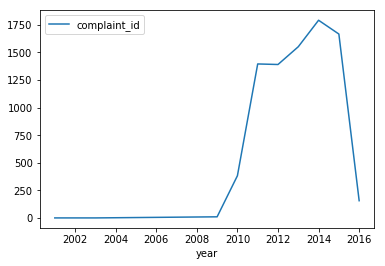

In [29]:
complaints_year.plot()
#pylab.ylim([0,1900])

Cool, we made a picture!

This visualization raises a lot of questions — why so few reports pre-2010? Are 2010 and 2016 really abberations, or is this partial data for some reason? Before you get much further, you're probably going to want to circle back to your data source or another expert to find out exactly how these data were collected. But of course, we don't have time for that today!

Instead, let's filter those older records so we can get a better picture of complaints since 2010 and throw a title on that chart. And heck, for good measure let's export it to a file so we can share it.

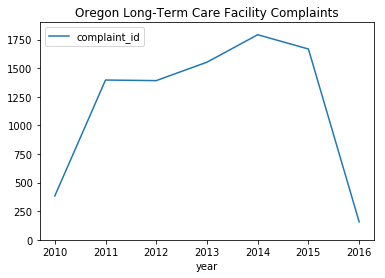

In [30]:
complaints_year = complaints_year[complaints_year.index >2009]
complaints_year.plot(title="Oregon Long-Term Care Facility Complaints")
pylab.ylim([0,1900])

#and for good measure, let's save it to a file
plt.savefig("output/plot.png",format="png")
plt.savefig("output/plot.svg",format="svg")

Nice! Now let's see which facilities have the highest ratio of complaints.

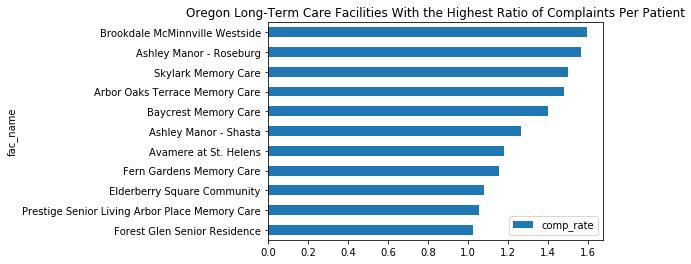

In [31]:
facility_ratio[facility_ratio["comp_rate"]>1].plot.barh(title="Oregon Long-Term Care Facilities With the Highest Ratio of Complaints Per Patient").invert_yaxis()

These are not the prettiest charts ever, by a long shot, but in a pinch, they're a very fast way to visualize the data you're working with, and if you're going to end up putting the chart in D3 or handing it off to a designer for print purposes, this may suffice.

If you're looking to up your visualization game, check out [`seaborn`](https://seaborn.pydata.org/), which will give you prettier static charts right out of the box, or [`bokeh`](https://bokeh.pydata.org/en/latest/) for interactive graphics.